# Driver Analysis

Billy Caine, Xander Palermo, Sudarshan Tiwari

Analyzing lap times, podiums, wins, championships, career length, and races to determine best drivers.

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [33]:
sns.set_palette('bright')

## Reading DataFrames

In [4]:
driver = pd.read_pickle("driver.plk")
driver

,id,name,first_name,last_name,full_name,abbreviation,permanent_number,gender,date_of_birth,date_of_death,...,total_race_starts,total_race_wins,total_race_laps,total_podiums,total_points,total_championship_points,total_pole_positions,total_fastest_laps,total_driver_of_the_day,total_grand_slams
0,adderly-fong,Adderly Fong,Adderly,Fong,Adderly Fong Cheun-yue,FON,None,MALE,1990-03-02,None,...,0,0,0,0,0.0,0.0,0,0,0,0
1,adolf-brudes,Adolf Brudes,Adolf,Brudes,Adolf Brudes von Breslau,BRU,None,MALE,1899-10-15,1986-11-05,...,1,0,5,0,0.0,0.0,0,0,0,0
2,adolfo-schwelm-cruz,Adolfo Schwelm Cruz,Adolfo,Schwelm Cruz,Adolfo Julio Carlos Schwelm Cruz,SCH,None,MALE,1923-06-28,2012-02-10,...,1,0,20,0,0.0,0.0,0,0,0,0
3,adrian-campos,Adrián Campos,Adrián,Campos,Adrián Campos Suñer,CAM,None,MALE,1960-06-17,2021-01-27,...,17,0,433,0,0.0,0.0,0,0,0,0
4,adrian-sutil,Adrian Sutil,Adrian,Sutil,Adrian Sutil,SUT,None,MALE,1983-01-11,None,...,128,0,6022,0,124.0,124.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,yuji-ide,Yuji Ide,Yuji,Ide,Yuji Ide,IDE,None,MALE,1975-01-21,None,...,4,0,145,0,0.0,0.0,0,0,0,0
908,yuki-tsunoda,Yuki Tsunoda,Yuki,Tsunoda,Yuki Tsunoda,TSU,22,MALE,2000-05-11,None,...,105,0,5653,0,111.0,111.0,0,1,2,0
909,yves-giraud-cabantous,Yves Giraud-Cabantous,Yves,Giraud-Cabantous,Marius Aristide Yves Giraud-Cabantous,CAB,None,MALE,1904-10-08,1973-03-30,...,13,0,522,0,5.0,5.0,0,0,0,0
910,zak-osullivan,Zak O'Sullivan,Zak,O'Sullivan,Zak O'Sullivan,OSU,None,MALE,2005-02-06,None,...,0,0,0,0,0.0,0.0,0,0,0,0


In [5]:
driver_by_season = pd.read_pickle("season_driver.plk")
driver_by_season

,year,driver_id,position_number,position_text,best_starting_grid_position,best_race_result,total_race_entries,total_race_starts,total_race_wins,total_race_laps,total_podiums,total_points,total_pole_positions,total_fastest_laps,total_driver_of_the_day,total_grand_slams
0,1950,juan-manuel-fangio,2.0,2,1.0,1.0,6,6,3,317,3,27.0,4,3,0,0
1,1950,luigi-fagioli,3.0,3,2.0,2.0,6,6,0,291,5,28.0,0,0,0,0
2,1950,nino-farina,1.0,1,1.0,1.0,6,6,3,282,3,30.0,2,3,0,0
3,1950,reg-parnell,9.0,9,4.0,3.0,2,2,0,80,1,4.0,0,0,0,0
4,1950,consalvo-sanesi,NaN,None,4.0,NaN,1,1,0,11,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,2025,lewis-hamilton,6.0,6,4.0,4.0,18,18,0,1030,0,125.0,0,1,2,0
3375,2025,dino-beganovic,NaN,None,NaN,NaN,0,0,0,0,0,0.0,0,0,0,0
3376,2025,gabriel-bortoleto,18.0,18,7.0,6.0,18,18,0,986,0,18.0,0,0,2,0
3377,2025,nico-hulkenberg,10.0,10,11.0,3.0,18,17,0,963,1,37.0,0,0,1,0


In [6]:
race_data = pd.read_pickle("race_data.plk")
race_data

,race_id,type,position_display_order,position_number,position_text,driver_number,driver_id,constructor_id,engine_manufacturer_id,tyre_manufacturer_id,...,fastest_lap_time_millis,fastest_lap_gap,fastest_lap_gap_millis,fastest_lap_interval,fastest_lap_interval_millis,pit_stop_stop,pit_stop_lap,pit_stop_time,pit_stop_time_millis,driver_of_the_day_percentage
0,290,PRE_QUALIFYING_RESULT,1,1.0,1,40,gilles-villeneuve,mclaren,ford,goodyear,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
1,290,PRE_QUALIFYING_RESULT,2,2.0,2,23,patrick-tambay,ensign,ford,goodyear,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
2,290,PRE_QUALIFYING_RESULT,3,3.0,3,34,jean-pierre-jarier,penske,ford,goodyear,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
3,290,PRE_QUALIFYING_RESULT,4,4.0,4,30,brett-lunger,mclaren,ford,goodyear,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
4,290,PRE_QUALIFYING_RESULT,5,5.0,5,38,brian-henton,march,ford,goodyear,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183627,1143,DRIVER_OF_THE_DAY_RESULT,1,1.0,1,14,fernando-alonso,aston-martin,mercedes,pirelli,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,22.5
183628,1143,DRIVER_OF_THE_DAY_RESULT,2,2.0,2,63,george-russell,mercedes,mercedes,pirelli,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,16.4
183629,1143,DRIVER_OF_THE_DAY_RESULT,3,3.0,3,1,max-verstappen,red-bull,honda-rbpt,pirelli,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,14.5
183630,1143,DRIVER_OF_THE_DAY_RESULT,4,4.0,4,4,lando-norris,mclaren,mercedes,pirelli,...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,8.7


## Cleaning DataFrames

### driver DataFrame

In [7]:
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             912 non-null    object 
 1   name                           912 non-null    object 
 2   first_name                     912 non-null    object 
 3   last_name                      912 non-null    object 
 4   full_name                      912 non-null    object 
 5   abbreviation                   912 non-null    object 
 6   permanent_number               47 non-null     object 
 7   gender                         912 non-null    object 
 8   date_of_birth                  912 non-null    object 
 9   date_of_death                  501 non-null    object 
 10  place_of_birth                 912 non-null    object 
 11  country_of_birth_country_id    912 non-null    object 
 12  nationality_country_id         912 non-null    obj

In [8]:
driver = driver.drop(columns=['full_name','permanent_number','gender','date_of_birth','date_of_death','place_of_birth',
                              'country_of_birth_country_id','second_nationality_country_id','total_race_entries',
                              'total_championship_points','total_driver_of_the_day'])
driver

,id,name,first_name,last_name,abbreviation,nationality_country_id,best_championship_position,best_starting_grid_position,best_race_result,total_championship_wins,total_race_starts,total_race_wins,total_race_laps,total_podiums,total_points,total_pole_positions,total_fastest_laps,total_grand_slams
0,adderly-fong,Adderly Fong,Adderly,Fong,FON,hong-kong,NaN,NaN,NaN,0,0,0,0,0,0.0,0,0,0
1,adolf-brudes,Adolf Brudes,Adolf,Brudes,BRU,germany,NaN,19.0,NaN,0,1,0,5,0,0.0,0,0,0
2,adolfo-schwelm-cruz,Adolfo Schwelm Cruz,Adolfo,Schwelm Cruz,SCH,argentina,NaN,13.0,NaN,0,1,0,20,0,0.0,0,0,0
3,adrian-campos,Adrián Campos,Adrián,Campos,CAM,spain,NaN,16.0,14.0,0,17,0,433,0,0.0,0,0,0
4,adrian-sutil,Adrian Sutil,Adrian,Sutil,SUT,germany,9.0,2.0,4.0,0,128,0,6022,0,124.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,yuji-ide,Yuji Ide,Yuji,Ide,IDE,japan,25.0,18.0,13.0,0,4,0,145,0,0.0,0,0,0
908,yuki-tsunoda,Yuki Tsunoda,Yuki,Tsunoda,TSU,japan,12.0,3.0,4.0,0,105,0,5653,0,111.0,0,1,0
909,yves-giraud-cabantous,Yves Giraud-Cabantous,Yves,Giraud-Cabantous,CAB,france,14.0,5.0,4.0,0,13,0,522,0,5.0,0,0,0
910,zak-osullivan,Zak O'Sullivan,Zak,O'Sullivan,OSU,united-kingdom,NaN,NaN,NaN,0,0,0,0,0,0.0,0,0,0


### driver_by_season DataFrame

In [9]:
driver_by_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3379 entries, 0 to 3378
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         3379 non-null   int64  
 1   driver_id                    3379 non-null   object 
 2   position_number              1657 non-null   float64
 3   position_text                1658 non-null   object 
 4   best_starting_grid_position  3041 non-null   float64
 5   best_race_result             2652 non-null   float64
 6   total_race_entries           3379 non-null   int64  
 7   total_race_starts            3379 non-null   int64  
 8   total_race_wins              3379 non-null   int64  
 9   total_race_laps              3379 non-null   int64  
 10  total_podiums                3379 non-null   int64  
 11  total_points                 3379 non-null   float64
 12  total_pole_positions         3379 non-null   int64  
 13  total_fastest_laps

In [10]:
driver_by_season = driver_by_season.drop(columns=['position_number','total_race_entries','total_driver_of_the_day'])
driver_by_season = driver_by_season.rename(columns={'position_text':'position'})
driver_by_season

,year,driver_id,position,best_starting_grid_position,best_race_result,total_race_starts,total_race_wins,total_race_laps,total_podiums,total_points,total_pole_positions,total_fastest_laps,total_grand_slams
0,1950,juan-manuel-fangio,2,1.0,1.0,6,3,317,3,27.0,4,3,0
1,1950,luigi-fagioli,3,2.0,2.0,6,0,291,5,28.0,0,0,0
2,1950,nino-farina,1,1.0,1.0,6,3,282,3,30.0,2,3,0
3,1950,reg-parnell,9,4.0,3.0,2,0,80,1,4.0,0,0,0
4,1950,consalvo-sanesi,None,4.0,NaN,1,0,11,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,2025,lewis-hamilton,6,4.0,4.0,18,0,1030,0,125.0,0,1,0
3375,2025,dino-beganovic,None,NaN,NaN,0,0,0,0,0.0,0,0,0
3376,2025,gabriel-bortoleto,18,7.0,6.0,18,0,986,0,18.0,0,0,0
3377,2025,nico-hulkenberg,10,11.0,3.0,17,0,963,1,37.0,0,0,0


### race_data DataFrame

In [11]:
race_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183632 entries, 0 to 183631
Data columns (total 71 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   race_id                                               183632 non-null  int64  
 1   type                                                  183632 non-null  object 
 2   position_display_order                                183632 non-null  int64  
 3   position_number                                       172468 non-null  float64
 4   position_text                                         183632 non-null  object 
 5   driver_number                                         183632 non-null  object 
 6   driver_id                                             183632 non-null  object 
 7   constructor_id                                        183632 non-null  object 
 8   engine_manufacturer_id                      

In [12]:
race_data = race_data.drop(columns=['position_display_order','position_number','driver_number',
                                    'engine_manufacturer_id','tyre_manufacturer_id','practice_time','practice_time_millis',
                                    'practice_gap','practice_gap_millis','qualifying_time_millis','qualifying_q1_millis',
                                    'qualifying_q2_millis','qualifying_q3_millis','qualifying_interval',
                                    'qualifying_interval_millis','starting_grid_position_qualification_position_number',
                                    'starting_grid_position_time','starting_grid_position_time_millis','race_time_millis',
                                    'race_gap','race_gap_millis','race_qualification_position_number',
                                    'race_driver_of_the_day','fastest_lap_time_millis','fastest_lap_gap',
                                    'fastest_lap_gap_millis','fastest_lap_interval','fastest_lap_interval_millis',
                                    'pit_stop_time_millis','driver_of_the_day_percentage'])
race_data = race_data.rename(columns={'position_text':'position'})
race_data

,race_id,type,position,driver_id,constructor_id,practice_interval,practice_interval_millis,practice_laps,qualifying_time,qualifying_q1,...,race_grid_position_text,race_positions_gained,race_pit_stops,race_fastest_lap,race_grand_slam,fastest_lap_lap,fastest_lap_time,pit_stop_stop,pit_stop_lap,pit_stop_time
0,290,PRE_QUALIFYING_RESULT,1,gilles-villeneuve,mclaren,None,NaN,NaN,1:19.480,None,...,None,NaN,NaN,None,None,NaN,None,NaN,NaN,None
1,290,PRE_QUALIFYING_RESULT,2,patrick-tambay,ensign,None,NaN,NaN,1:19.550,None,...,None,NaN,NaN,None,None,NaN,None,NaN,NaN,None
2,290,PRE_QUALIFYING_RESULT,3,jean-pierre-jarier,penske,None,NaN,NaN,1:19.630,None,...,None,NaN,NaN,None,None,NaN,None,NaN,NaN,None
3,290,PRE_QUALIFYING_RESULT,4,brett-lunger,mclaren,None,NaN,NaN,1:19.720,None,...,None,NaN,NaN,None,None,NaN,None,NaN,NaN,None
4,290,PRE_QUALIFYING_RESULT,5,brian-henton,march,None,NaN,NaN,1:19.820,None,...,None,NaN,NaN,None,None,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183627,1143,DRIVER_OF_THE_DAY_RESULT,1,fernando-alonso,aston-martin,None,NaN,NaN,None,None,...,None,NaN,NaN,None,None,NaN,None,NaN,NaN,None
183628,1143,DRIVER_OF_THE_DAY_RESULT,2,george-russell,mercedes,None,NaN,NaN,None,None,...,None,NaN,NaN,None,None,NaN,None,NaN,NaN,None
183629,1143,DRIVER_OF_THE_DAY_RESULT,3,max-verstappen,red-bull,None,NaN,NaN,None,None,...,None,NaN,NaN,None,None,NaN,None,NaN,NaN,None
183630,1143,DRIVER_OF_THE_DAY_RESULT,4,lando-norris,mclaren,None,NaN,NaN,None,None,...,None,NaN,NaN,None,None,NaN,None,NaN,NaN,None


## Analyzing Drivers

In [13]:
driver['win_rank'] = driver.total_race_wins.rank(method='max', ascending=False)
top_10_wins = driver.sort_values('win_rank').head(10)
top_10_wins

,id,name,first_name,last_name,abbreviation,nationality_country_id,best_championship_position,best_starting_grid_position,best_race_result,total_championship_wins,total_race_starts,total_race_wins,total_race_laps,total_podiums,total_points,total_pole_positions,total_fastest_laps,total_grand_slams,win_rank
558,lewis-hamilton,Lewis Hamilton,Lewis,Hamilton,HAM,united-kingdom,1.0,1.0,1.0,7,374,105,21325,202,4987.5,104,68,6,1.0
619,michael-schumacher,Michael Schumacher,Michael,Schumacher,MSC,germany,1.0,1.0,1.0,7,306,91,16825,155,1566.0,68,77,5,2.0
613,max-verstappen,Max Verstappen,Max,Verstappen,VER,netherlands,1.0,1.0,1.0,4,227,67,12329,121,3296.5,46,35,6,3.0
816,sebastian-vettel,Sebastian Vettel,Sebastian,Vettel,VET,germany,1.0,1.0,1.0,4,299,53,16426,122,3098.0,57,38,4,4.0
10,alain-prost,Alain Prost,Alain,Prost,PRO,france,1.0,1.0,1.0,4,199,51,10540,106,798.5,33,41,0,5.0
70,ayrton-senna,Ayrton Senna,Ayrton,Senna,SEN,brazil,1.0,1.0,1.0,3,161,41,8219,80,614.0,65,19,4,6.0
280,fernando-alonso,Fernando Alonso,Fernando,Alonso,ALO,spain,1.0,1.0,1.0,2,420,32,22758,106,2373.0,22,26,0,7.0
659,nigel-mansell,Nigel Mansell,Nigel,Mansell,MAN,united-kingdom,1.0,1.0,1.0,1,187,31,8750,59,482.0,32,30,4,8.0
412,jackie-stewart,Jackie Stewart,Jackie,Stewart,STE,united-kingdom,1.0,1.0,1.0,3,99,27,5225,43,360.0,17,15,4,9.0
448,jim-clark,Jim Clark,Jim,Clark,CLA,united-kingdom,1.0,1.0,1.0,2,72,25,3877,32,274.0,33,28,8,11.0


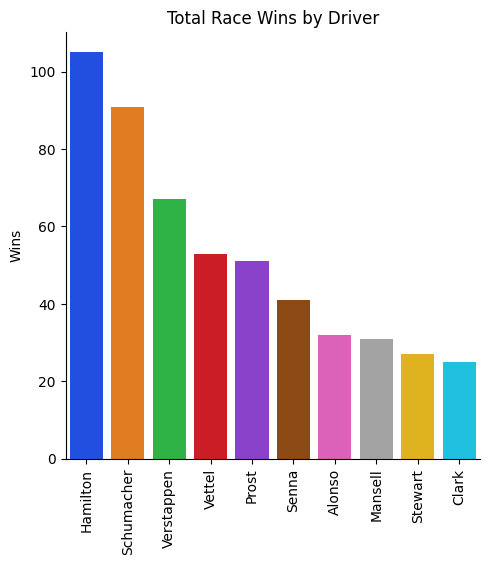

In [34]:
g = sns.catplot(data=top_10_wins, kind='bar', x='last_name', y='total_race_wins', errorbar=None, hue='last_name')
for ax in g.axes.flat:
    ax.set_title('Total Race Wins by Driver')
    ax.set_xlabel('')
    ax.set_ylabel('Wins')
    ax.tick_params('x', labelrotation=90)

In [16]:
driver['championship_rank'] = driver.total_championship_wins.rank(method='max', ascending=False)
top_10_champs = driver.sort_values('championship_rank').head(10)
top_10_champs

,id,name,first_name,last_name,abbreviation,nationality_country_id,best_championship_position,best_starting_grid_position,best_race_result,total_championship_wins,total_race_starts,total_race_wins,total_race_laps,total_podiums,total_points,total_pole_positions,total_fastest_laps,total_grand_slams,win_rank,championship_rank
619,michael-schumacher,Michael Schumacher,Michael,Schumacher,MSC,germany,1.0,1.0,1.0,7,306,91,16825,155,1566.00,68,77,5,2.0,2.0
558,lewis-hamilton,Lewis Hamilton,Lewis,Hamilton,HAM,united-kingdom,1.0,1.0,1.0,7,374,105,21325,202,4987.50,104,68,6,1.0,2.0
511,juan-manuel-fangio,Juan Manuel Fangio,Juan Manuel,Fangio,FAN,argentina,1.0,1.0,1.0,5,51,24,2960,35,277.64,29,23,0,12.0,3.0
10,alain-prost,Alain Prost,Alain,Prost,PRO,france,1.0,1.0,1.0,4,199,51,10540,106,798.50,33,41,0,5.0,6.0
613,max-verstappen,Max Verstappen,Max,Verstappen,VER,netherlands,1.0,1.0,1.0,4,227,67,12329,121,3296.50,46,35,6,3.0,6.0
816,sebastian-vettel,Sebastian Vettel,Sebastian,Vettel,VET,germany,1.0,1.0,1.0,4,299,53,16426,122,3098.00,57,38,4,4.0,6.0
412,jackie-stewart,Jackie Stewart,Jackie,Stewart,STE,united-kingdom,1.0,1.0,1.0,3,99,27,5225,43,360.00,17,15,4,9.0,11.0
651,nelson-piquet,Nelson Piquet,Nelson,Piquet,PIQ,brazil,1.0,1.0,1.0,3,203,23,9870,60,485.50,24,23,3,14.0,11.0
660,niki-lauda,Niki Lauda,Niki,Lauda,LAU,austria,1.0,1.0,1.0,3,171,25,8213,54,420.50,24,24,0,11.0,11.0
403,jack-brabham,Jack Brabham,Jack,Brabham,BRA,australia,1.0,1.0,1.0,3,126,14,6124,31,261.00,13,12,0,22.0,11.0


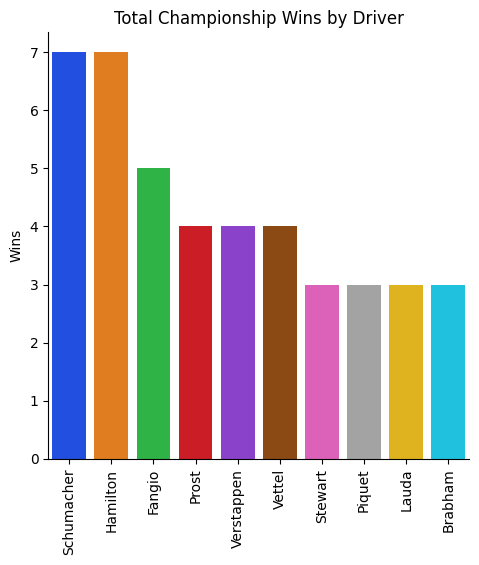

In [35]:
p = sns.catplot(data=top_10_champs, kind='bar', x='last_name', y='total_championship_wins', errorbar=None, hue='last_name')
for ax in p.axes.flat:
    ax.set_title('Total Championship Wins by Driver')
    ax.set_xlabel('')
    ax.set_ylabel('Wins')
    ax.tick_params('x', labelrotation=90)

In [18]:
# This is grand slams (where the driver gets pole position, leads every lap, sets the fastest lap, and wins the race)
driver['slam_rank'] = driver.total_grand_slams.rank(method='max', ascending=False)
top_10_slams = driver.sort_values('slam_rank').head(10)
top_10_slams

,id,name,first_name,last_name,abbreviation,nationality_country_id,best_championship_position,best_starting_grid_position,best_race_result,total_championship_wins,...,total_race_wins,total_race_laps,total_podiums,total_points,total_pole_positions,total_fastest_laps,total_grand_slams,win_rank,championship_rank,slam_rank
448,jim-clark,Jim Clark,Jim,Clark,CLA,united-kingdom,1.0,1.0,1.0,2,...,25,3877,32,274.00,33,28,8,11.0,17.0,1.0
558,lewis-hamilton,Lewis Hamilton,Lewis,Hamilton,HAM,united-kingdom,1.0,1.0,1.0,7,...,105,21325,202,4987.50,104,68,6,1.0,2.0,3.0
613,max-verstappen,Max Verstappen,Max,Verstappen,VER,netherlands,1.0,1.0,1.0,4,...,67,12329,121,3296.50,46,35,6,3.0,6.0,3.0
17,alberto-ascari,Alberto Ascari,Alberto,Ascari,ASC,italy,1.0,1.0,1.0,2,...,13,1609,17,140.14,14,13,5,24.0,17.0,5.0
619,michael-schumacher,Michael Schumacher,Michael,Schumacher,MSC,germany,1.0,1.0,1.0,7,...,91,16825,155,1566.00,68,77,5,2.0,2.0,5.0
412,jackie-stewart,Jackie Stewart,Jackie,Stewart,STE,united-kingdom,1.0,1.0,1.0,3,...,27,5225,43,360.00,17,15,4,9.0,11.0,9.0
816,sebastian-vettel,Sebastian Vettel,Sebastian,Vettel,VET,germany,1.0,1.0,1.0,4,...,53,16426,122,3098.00,57,38,4,4.0,6.0,9.0
659,nigel-mansell,Nigel Mansell,Nigel,Mansell,MAN,united-kingdom,1.0,1.0,1.0,1,...,31,8750,59,482.00,32,30,4,8.0,34.0,9.0
70,ayrton-senna,Ayrton Senna,Ayrton,Senna,SEN,brazil,1.0,1.0,1.0,3,...,41,8219,80,614.00,65,19,4,6.0,11.0,9.0
651,nelson-piquet,Nelson Piquet,Nelson,Piquet,PIQ,brazil,1.0,1.0,1.0,3,...,23,9870,60,485.50,24,23,3,14.0,11.0,10.0


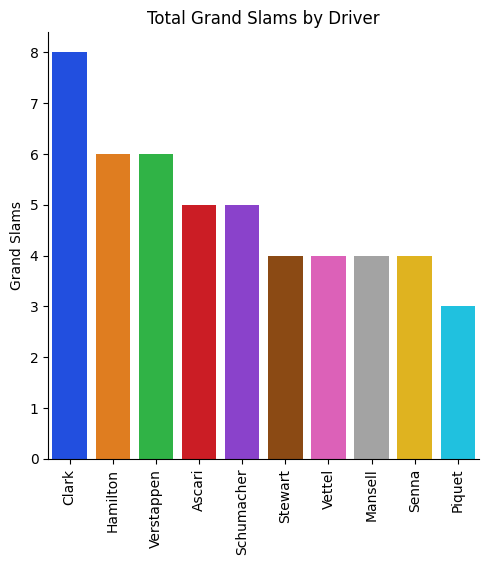

In [36]:
w = sns.catplot(data=top_10_slams, kind='bar', x='last_name', y='total_grand_slams', errorbar=None, hue='last_name')
for ax in w.axes.flat:
    ax.set_title('Total Grand Slams by Driver')
    ax.set_xlabel('')
    ax.set_ylabel('Grand Slams')
    ax.tick_params('x', labelrotation=90)

In [21]:
driver['fastest_lap_rank'] = driver.total_fastest_laps.rank(method='max', ascending=False)
top_10_fast_laps = driver.sort_values('fastest_lap_rank').head(10)
top_10_fast_laps

,id,name,first_name,last_name,abbreviation,nationality_country_id,best_championship_position,best_starting_grid_position,best_race_result,total_championship_wins,...,total_race_laps,total_podiums,total_points,total_pole_positions,total_fastest_laps,total_grand_slams,win_rank,championship_rank,slam_rank,fastest_lap_rank
619,michael-schumacher,Michael Schumacher,Michael,Schumacher,MSC,germany,1.0,1.0,1.0,7,...,16825,155,1566.0,68,77,5,2.0,2.0,5.0,1.0
558,lewis-hamilton,Lewis Hamilton,Lewis,Hamilton,HAM,united-kingdom,1.0,1.0,1.0,7,...,21325,202,4987.5,104,68,6,1.0,2.0,3.0,2.0
537,kimi-raikkonen,Kimi Räikkönen,Kimi,Räikkönen,RAI,finland,1.0,1.0,1.0,1,...,18621,103,1873.0,18,46,0,16.0,34.0,912.0,3.0
10,alain-prost,Alain Prost,Alain,Prost,PRO,france,1.0,1.0,1.0,4,...,10540,106,798.5,33,41,0,5.0,6.0,912.0,4.0
816,sebastian-vettel,Sebastian Vettel,Sebastian,Vettel,VET,germany,1.0,1.0,1.0,4,...,16426,122,3098.0,57,38,4,4.0,6.0,9.0,5.0
613,max-verstappen,Max Verstappen,Max,Verstappen,VER,netherlands,1.0,1.0,1.0,4,...,12329,121,3296.5,46,35,6,3.0,6.0,3.0,6.0
659,nigel-mansell,Nigel Mansell,Nigel,Mansell,MAN,united-kingdom,1.0,1.0,1.0,1,...,8750,59,482.0,32,30,4,8.0,34.0,9.0,7.0
448,jim-clark,Jim Clark,Jim,Clark,CLA,united-kingdom,1.0,1.0,1.0,2,...,3877,32,274.0,33,28,8,11.0,17.0,1.0,8.0
280,fernando-alonso,Fernando Alonso,Fernando,Alonso,ALO,spain,1.0,1.0,1.0,2,...,22758,106,2373.0,22,26,0,7.0,17.0,912.0,9.0
624,mika-hakkinen,Mika Häkkinen,Mika,Häkkinen,HAK,finland,1.0,1.0,1.0,2,...,7719,51,420.0,26,25,0,17.0,17.0,912.0,10.0


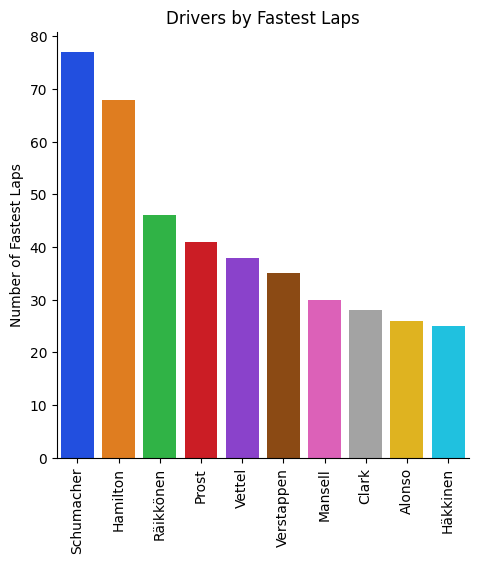

In [37]:
f = sns.catplot(data=top_10_fast_laps, kind='bar', x='last_name', y='total_fastest_laps', errorbar=None, hue='last_name')
for ax in f.axes.flat:
    ax.set_title('Drivers by Fastest Laps')
    ax.set_xlabel('')
    ax.set_ylabel('Number of Fastest Laps')
    ax.tick_params('x', labelrotation=90)

In [23]:
# This is by podiums which means first, second, or third
driver['podium_rank'] = driver.total_podiums.rank(method='max', ascending=False)
top_10_podiums = driver.sort_values('podium_rank').head(10)
top_10_podiums

,id,name,first_name,last_name,abbreviation,nationality_country_id,best_championship_position,best_starting_grid_position,best_race_result,total_championship_wins,...,total_podiums,total_points,total_pole_positions,total_fastest_laps,total_grand_slams,win_rank,championship_rank,slam_rank,fastest_lap_rank,podium_rank
558,lewis-hamilton,Lewis Hamilton,Lewis,Hamilton,HAM,united-kingdom,1.0,1.0,1.0,7,...,202,4987.5,104,68,6,1.0,2.0,3.0,2.0,1.0
619,michael-schumacher,Michael Schumacher,Michael,Schumacher,MSC,germany,1.0,1.0,1.0,7,...,155,1566.0,68,77,5,2.0,2.0,5.0,1.0,2.0
816,sebastian-vettel,Sebastian Vettel,Sebastian,Vettel,VET,germany,1.0,1.0,1.0,4,...,122,3098.0,57,38,4,4.0,6.0,9.0,5.0,3.0
613,max-verstappen,Max Verstappen,Max,Verstappen,VER,netherlands,1.0,1.0,1.0,4,...,121,3296.5,46,35,6,3.0,6.0,3.0,6.0,4.0
10,alain-prost,Alain Prost,Alain,Prost,PRO,france,1.0,1.0,1.0,4,...,106,798.5,33,41,0,5.0,6.0,912.0,4.0,6.0
280,fernando-alonso,Fernando Alonso,Fernando,Alonso,ALO,spain,1.0,1.0,1.0,2,...,106,2373.0,22,26,0,7.0,17.0,912.0,9.0,6.0
537,kimi-raikkonen,Kimi Räikkönen,Kimi,Räikkönen,RAI,finland,1.0,1.0,1.0,1,...,103,1873.0,18,46,0,16.0,34.0,912.0,3.0,7.0
70,ayrton-senna,Ayrton Senna,Ayrton,Senna,SEN,brazil,1.0,1.0,1.0,3,...,80,614.0,65,19,4,6.0,11.0,9.0,20.0,8.0
801,rubens-barrichello,Rubens Barrichello,Rubens,Barrichello,BAR,brazil,2.0,1.0,1.0,0,...,68,658.0,14,17,0,30.0,912.0,912.0,24.0,9.0
881,valtteri-bottas,Valtteri Bottas,Valtteri,Bottas,BOT,finland,2.0,1.0,1.0,0,...,67,1797.0,20,19,0,35.0,912.0,912.0,20.0,10.0


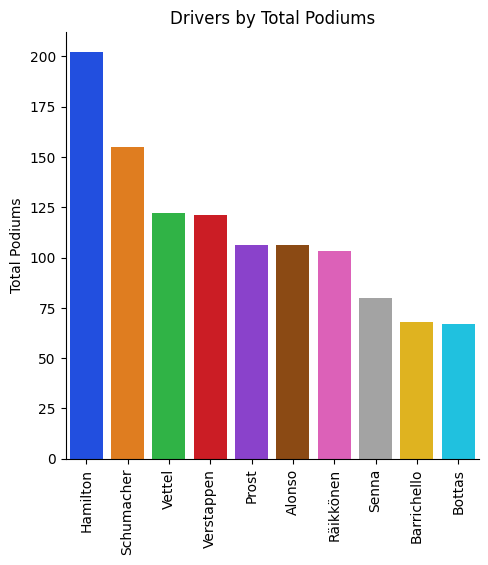

In [38]:
po = sns.catplot(data=top_10_podiums, kind='bar', x='last_name', y='total_podiums', errorbar=None, hue='last_name')
for ax in po.axes.flat:
    ax.set_title('Drivers by Total Podiums')
    ax.set_xlabel('')
    ax.set_ylabel('Total Podiums')
    ax.tick_params('x', labelrotation=90)

In [25]:
driver['pole_position_rank'] = driver.total_pole_positions.rank(method='max', ascending=False)
top_10_pole_positions = driver.sort_values('pole_position_rank').head(10)
top_10_pole_positions

,id,name,first_name,last_name,abbreviation,nationality_country_id,best_championship_position,best_starting_grid_position,best_race_result,total_championship_wins,...,total_points,total_pole_positions,total_fastest_laps,total_grand_slams,win_rank,championship_rank,slam_rank,fastest_lap_rank,podium_rank,pole_position_rank
558,lewis-hamilton,Lewis Hamilton,Lewis,Hamilton,HAM,united-kingdom,1.0,1.0,1.0,7,...,4987.50,104,68,6,1.0,2.0,3.0,2.0,1.0,1.0
619,michael-schumacher,Michael Schumacher,Michael,Schumacher,MSC,germany,1.0,1.0,1.0,7,...,1566.00,68,77,5,2.0,2.0,5.0,1.0,2.0,2.0
70,ayrton-senna,Ayrton Senna,Ayrton,Senna,SEN,brazil,1.0,1.0,1.0,3,...,614.00,65,19,4,6.0,11.0,9.0,20.0,8.0,3.0
816,sebastian-vettel,Sebastian Vettel,Sebastian,Vettel,VET,germany,1.0,1.0,1.0,4,...,3098.00,57,38,4,4.0,6.0,9.0,5.0,3.0,4.0
613,max-verstappen,Max Verstappen,Max,Verstappen,VER,netherlands,1.0,1.0,1.0,4,...,3296.50,46,35,6,3.0,6.0,3.0,6.0,4.0,5.0
448,jim-clark,Jim Clark,Jim,Clark,CLA,united-kingdom,1.0,1.0,1.0,2,...,274.00,33,28,8,11.0,17.0,1.0,8.0,36.0,7.0
10,alain-prost,Alain Prost,Alain,Prost,PRO,france,1.0,1.0,1.0,4,...,798.50,33,41,0,5.0,6.0,912.0,4.0,6.0,7.0
659,nigel-mansell,Nigel Mansell,Nigel,Mansell,MAN,united-kingdom,1.0,1.0,1.0,1,...,482.00,32,30,4,8.0,34.0,9.0,7.0,13.0,8.0
656,nico-rosberg,Nico Rosberg,Nico,Rosberg,ROS,germany,1.0,1.0,1.0,1,...,1594.50,30,20,0,14.0,34.0,912.0,15.0,14.0,9.0
511,juan-manuel-fangio,Juan Manuel Fangio,Juan Manuel,Fangio,FAN,argentina,1.0,1.0,1.0,5,...,277.64,29,23,0,12.0,3.0,912.0,13.0,30.0,10.0


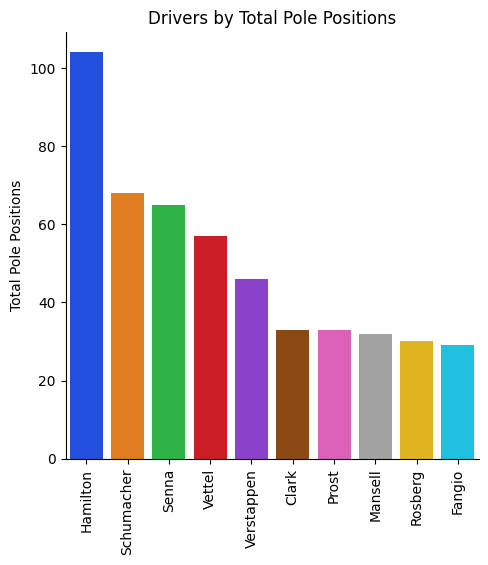

In [39]:
pole = sns.catplot(data=top_10_pole_positions, kind='bar', x='last_name', y='total_pole_positions', errorbar=None,
                  hue='last_name')
for ax in pole.axes.flat:
    ax.set_title('Drivers by Total Pole Positions')
    ax.set_xlabel('')
    ax.set_ylabel('Total Pole Positions')
    ax.tick_params('x', labelrotation=90)

In [27]:
driver['points_rank'] = driver.total_points.rank(method='max', ascending=False)
top_10_points = driver.sort_values('points_rank').head(10)
top_10_points

,id,name,first_name,last_name,abbreviation,nationality_country_id,best_championship_position,best_starting_grid_position,best_race_result,total_championship_wins,...,total_pole_positions,total_fastest_laps,total_grand_slams,win_rank,championship_rank,slam_rank,fastest_lap_rank,podium_rank,pole_position_rank,points_rank
558,lewis-hamilton,Lewis Hamilton,Lewis,Hamilton,HAM,united-kingdom,1.0,1.0,1.0,7,...,104,68,6,1.0,2.0,3.0,2.0,1.0,1.0,1.0
613,max-verstappen,Max Verstappen,Max,Verstappen,VER,netherlands,1.0,1.0,1.0,4,...,46,35,6,3.0,6.0,3.0,6.0,4.0,5.0,2.0
816,sebastian-vettel,Sebastian Vettel,Sebastian,Vettel,VET,germany,1.0,1.0,1.0,4,...,57,38,4,4.0,6.0,9.0,5.0,3.0,4.0,3.0
280,fernando-alonso,Fernando Alonso,Fernando,Alonso,ALO,spain,1.0,1.0,1.0,2,...,22,26,0,7.0,17.0,912.0,9.0,6.0,15.0,4.0
537,kimi-raikkonen,Kimi Räikkönen,Kimi,Räikkönen,RAI,finland,1.0,1.0,1.0,1,...,18,46,0,16.0,34.0,912.0,3.0,7.0,20.0,5.0
881,valtteri-bottas,Valtteri Bottas,Valtteri,Bottas,BOT,finland,2.0,1.0,1.0,0,...,20,19,0,35.0,912.0,912.0,20.0,10.0,17.0,6.0
821,sergio-perez,Sergio Pérez,Sergio,Pérez,PER,mexico,2.0,1.0,1.0,0,...,3,12,0,52.0,912.0,912.0,35.0,26.0,68.0,7.0
145,charles-leclerc,Charles Leclerc,Charles,Leclerc,LEC,monaco,2.0,1.0,1.0,0,...,27,10,0,42.0,912.0,912.0,40.0,19.0,11.0,8.0
656,nico-rosberg,Nico Rosberg,Nico,Rosberg,ROS,germany,1.0,1.0,1.0,1,...,30,20,0,14.0,34.0,912.0,15.0,14.0,9.0,9.0
619,michael-schumacher,Michael Schumacher,Michael,Schumacher,MSC,germany,1.0,1.0,1.0,7,...,68,77,5,2.0,2.0,5.0,1.0,2.0,2.0,10.0


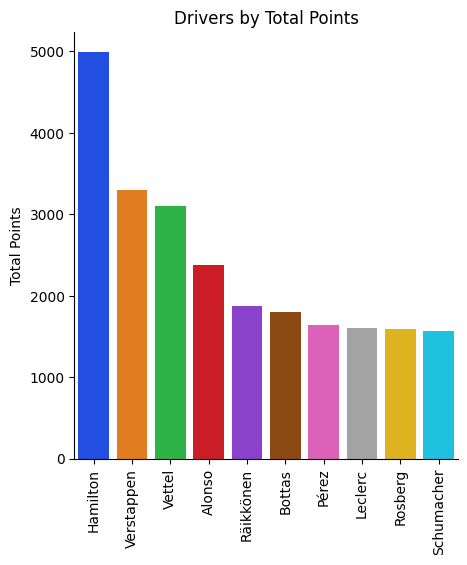

In [40]:
point = sns.catplot(data=top_10_points, kind='bar', x='last_name', y='total_points', errorbar=None, hue='last_name')
for ax in point.axes.flat:
    ax.set_title('Drivers by Total Points')
    ax.set_xlabel('')
    ax.set_ylabel('Total Points')
    ax.tick_params('x', labelrotation=90)

## Amount of Seasons and Races Driver has Competed in

In [29]:
season_group = driver_by_season.groupby('driver_id')
driver_season = season_group[['year']].count()
driver_season = driver_season.reset_index()
driver_season = driver_season.rename(columns={'year':'seasons','driver_id':'id'})
driver_season

,id,seasons
0,adderly-fong,1
1,adolf-brudes,1
2,adolfo-schwelm-cruz,1
3,adrian-campos,2
4,adrian-sutil,8
...,...,...
907,yuji-ide,1
908,yuki-tsunoda,5
909,yves-giraud-cabantous,4
910,zak-osullivan,1


In [30]:
# Adding the driver names to the driver_season DataFrame
driver_names = driver[['name','first_name','last_name','id']]
driver_merged = driver_season.merge(driver_names, on='id')
driver_merged

,id,seasons,name,first_name,last_name
0,adderly-fong,1,Adderly Fong,Adderly,Fong
1,adolf-brudes,1,Adolf Brudes,Adolf,Brudes
2,adolfo-schwelm-cruz,1,Adolfo Schwelm Cruz,Adolfo,Schwelm Cruz
3,adrian-campos,2,Adrián Campos,Adrián,Campos
4,adrian-sutil,8,Adrian Sutil,Adrian,Sutil
...,...,...,...,...,...
907,yuji-ide,1,Yuji Ide,Yuji,Ide
908,yuki-tsunoda,5,Yuki Tsunoda,Yuki,Tsunoda
909,yves-giraud-cabantous,4,Yves Giraud-Cabantous,Yves,Giraud-Cabantous
910,zak-osullivan,1,Zak O'Sullivan,Zak,O'Sullivan


In [31]:
driver_merged['seasons_ranked'] = driver_merged.seasons.rank(method='max', ascending=False)
top_10_seasons = driver_merged.sort_values('seasons_ranked').head(10)
top_10_seasons

,id,seasons,name,first_name,last_name,seasons_ranked
280,fernando-alonso,22,Fernando Alonso,Fernando,Alonso,1.0
801,rubens-barrichello,19,Rubens Barrichello,Rubens,Barrichello,5.0
536,kimi-raikkonen,19,Kimi Räikkönen,Kimi,Räikkönen,5.0
557,lewis-hamilton,19,Lewis Hamilton,Lewis,Hamilton,5.0
619,michael-schumacher,19,Michael Schumacher,Michael,Schumacher,5.0
345,graham-hill,18,Graham Hill,Graham,Hill,7.0
442,jenson-button,18,Jenson Button,Jenson,Button,7.0
761,riccardo-patrese,17,Riccardo Patrese,Riccardo,Patrese,9.0
816,sebastian-vettel,17,Sebastian Vettel,Sebastian,Vettel,9.0
461,jo-bonnier,16,Jo Bonnier,Jo,Bonnier,11.0


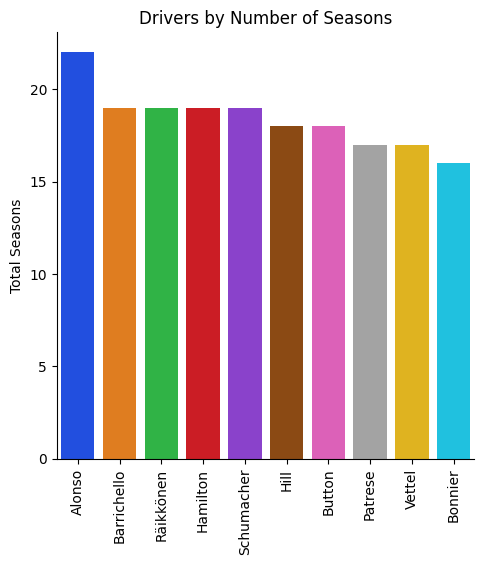

In [41]:
se = sns.catplot(data=top_10_seasons, kind='bar', x='last_name', y='seasons', errorbar=None, hue='last_name')
for ax in se.axes.flat:
    ax.set_title('Drivers by Number of Seasons')
    ax.set_xlabel('')
    ax.set_ylabel('Total Seasons')
    ax.tick_params('x', labelrotation=90)

It is worth noting that Alonso and Hamilton are current drivers.

In [42]:
races_grouped = race_data.groupby('driver_id')
career_races = races_grouped[['race_id']].nunique()
career_races = career_races.reset_index()
career_races = career_races.rename(columns={'driver_id':'id','race_id':'races'})
career_races

,id,races
0,adderly-fong,1
1,adolf-brudes,1
2,adolfo-schwelm-cruz,1
3,adrian-campos,21
4,adrian-sutil,131
...,...,...
904,yuji-ide,4
905,yuki-tsunoda,108
906,yves-giraud-cabantous,13
907,zak-osullivan,1


In [43]:
races_merged = career_races.merge(driver_names, on='id')
races_merged

,id,races,name,first_name,last_name
0,adderly-fong,1,Adderly Fong,Adderly,Fong
1,adolf-brudes,1,Adolf Brudes,Adolf,Brudes
2,adolfo-schwelm-cruz,1,Adolfo Schwelm Cruz,Adolfo,Schwelm Cruz
3,adrian-campos,21,Adrián Campos,Adrián,Campos
4,adrian-sutil,131,Adrian Sutil,Adrian,Sutil
...,...,...,...,...,...
904,yuji-ide,4,Yuji Ide,Yuji,Ide
905,yuki-tsunoda,108,Yuki Tsunoda,Yuki,Tsunoda
906,yves-giraud-cabantous,13,Yves Giraud-Cabantous,Yves,Giraud-Cabantous
907,zak-osullivan,1,Zak O'Sullivan,Zak,O'Sullivan


In [44]:
races_merged['races_rank'] = races_merged.races.rank(method='max', ascending=False)
top_10_races = races_merged.sort_values('races_rank').head(10)
top_10_races

,id,races,name,first_name,last_name,races_rank
279,fernando-alonso,422,Fernando Alonso,Fernando,Alonso,1.0
556,lewis-hamilton,374,Lewis Hamilton,Lewis,Hamilton,2.0
535,kimi-raikkonen,353,Kimi Räikkönen,Kimi,Räikkönen,3.0
799,rubens-barrichello,326,Rubens Barrichello,Rubens,Barrichello,4.0
441,jenson-button,309,Jenson Button,Jenson,Button,5.0
617,michael-schumacher,308,Michael Schumacher,Michael,Schumacher,6.0
813,sebastian-vettel,307,Sebastian Vettel,Sebastian,Vettel,7.0
818,sergio-perez,284,Sergio Pérez,Sergio,Pérez,8.0
277,felipe-massa,272,Felipe Massa,Felipe,Massa,9.0
184,daniel-ricciardo,266,Daniel Ricciardo,Daniel,Ricciardo,10.0


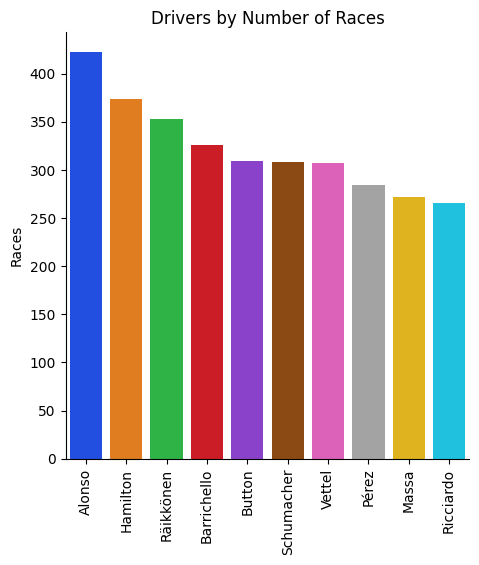

In [45]:
re = sns.catplot(data=top_10_races, kind='bar', x='last_name', y='races', errorbar=None, hue='last_name')
for ax in re.axes.flat:
    ax.set_title('Drivers by Number of Races')
    ax.set_xlabel('')
    ax.set_ylabel('Races')
    ax.tick_params('x', labelrotation=90)

## Top 10 Drivers Analysis

I chose our top 10 drivers based on how many times they appeared in the top 10 of the previous statistics. Lewis Hamilton, Michael Schumacher, and Sebastian Vettel with 9 each. Max Verstappen with 7. Fernando Alonso with 6. Alain Prost and Kimi Räikkönen with 5 each. Aryton Senna, Nigel Mansell, and Jim Clark with 4 each.

In [46]:
# Reclean Driver
driver_cleaned = driver.drop(columns=['win_rank','championship_rank','slam_rank','fastest_lap_rank','podium_rank',
                                      'pole_position_rank','points_rank'])

In [47]:
# new_driver_name DataFrame
new_driver_name = driver_cleaned.query('id == "lewis-hamilton" or id == "michael-schumacher" or id == "sebastian-vettel" or \
id == "max-verstappen" or id == "fernando-alonso" or id == "alain-prost" or id == "kimi-raikkonen" or id == "ayrton-senna" \
or id == "nigel-mansell" or id == "jim-clark"')
new_driver_name


,id,name,first_name,last_name,abbreviation,nationality_country_id,best_championship_position,best_starting_grid_position,best_race_result,total_championship_wins,total_race_starts,total_race_wins,total_race_laps,total_podiums,total_points,total_pole_positions,total_fastest_laps,total_grand_slams
10,alain-prost,Alain Prost,Alain,Prost,PRO,france,1.0,1.0,1.0,4,199,51,10540,106,798.5,33,41,0
70,ayrton-senna,Ayrton Senna,Ayrton,Senna,SEN,brazil,1.0,1.0,1.0,3,161,41,8219,80,614.0,65,19,4
280,fernando-alonso,Fernando Alonso,Fernando,Alonso,ALO,spain,1.0,1.0,1.0,2,420,32,22758,106,2373.0,22,26,0
448,jim-clark,Jim Clark,Jim,Clark,CLA,united-kingdom,1.0,1.0,1.0,2,72,25,3877,32,274.0,33,28,8
537,kimi-raikkonen,Kimi Räikkönen,Kimi,Räikkönen,RAI,finland,1.0,1.0,1.0,1,350,21,18621,103,1873.0,18,46,0
558,lewis-hamilton,Lewis Hamilton,Lewis,Hamilton,HAM,united-kingdom,1.0,1.0,1.0,7,374,105,21325,202,4987.5,104,68,6
613,max-verstappen,Max Verstappen,Max,Verstappen,VER,netherlands,1.0,1.0,1.0,4,227,67,12329,121,3296.5,46,35,6
619,michael-schumacher,Michael Schumacher,Michael,Schumacher,MSC,germany,1.0,1.0,1.0,7,306,91,16825,155,1566.0,68,77,5
659,nigel-mansell,Nigel Mansell,Nigel,Mansell,MAN,united-kingdom,1.0,1.0,1.0,1,187,31,8750,59,482.0,32,30,4
816,sebastian-vettel,Sebastian Vettel,Sebastian,Vettel,VET,germany,1.0,1.0,1.0,4,299,53,16426,122,3098.0,57,38,4


In [48]:
# new_seasons DataFrame
seasons_cleaned = driver_merged.drop(columns=['name','first_name','last_name'])
new_seasons = seasons_cleaned.query('id == "lewis-hamilton" or id == "michael-schumacher" or id == "sebastian-vettel" or \
id == "max-verstappen" or id == "fernando-alonso" or id == "alain-prost" or id == "kimi-raikkonen" or id == "ayrton-senna" \
or id == "nigel-mansell" or id == "jim-clark"')
new_seasons = new_seasons.drop(columns=['seasons_ranked'])
new_seasons

,id,seasons
10,alain-prost,13
70,ayrton-senna,11
280,fernando-alonso,22
447,jim-clark,9
536,kimi-raikkonen,19
557,lewis-hamilton,19
613,max-verstappen,12
619,michael-schumacher,19
659,nigel-mansell,15
816,sebastian-vettel,17


In [49]:
# new_races DataFrame
races_cleaned = races_merged.drop(columns=['name','first_name','last_name','races_rank'])
new_races = races_cleaned.query('id == "lewis-hamilton" or id == "michael-schumacher" or id == "sebastian-vettel" or \
id == "max-verstappen" or id == "fernando-alonso" or id == "alain-prost" or id == "kimi-raikkonen" or id == "ayrton-senna" \
or id == "nigel-mansell" or id == "jim-clark"')
new_races

,id,races
10,alain-prost,202
70,ayrton-senna,162
279,fernando-alonso,422
446,jim-clark,73
535,kimi-raikkonen,353
556,lewis-hamilton,374
611,max-verstappen,230
617,michael-schumacher,308
657,nigel-mansell,191
813,sebastian-vettel,307


In [50]:
# top_10_drivers DataFame
name_and_seasons = new_driver_name.merge(new_seasons, on='id')
top_10_drivers = name_and_seasons.merge(new_races, on='id')
top_10_drivers

,id,name,first_name,last_name,abbreviation,nationality_country_id,best_championship_position,best_starting_grid_position,best_race_result,total_championship_wins,total_race_starts,total_race_wins,total_race_laps,total_podiums,total_points,total_pole_positions,total_fastest_laps,total_grand_slams,seasons,races
0,alain-prost,Alain Prost,Alain,Prost,PRO,france,1.0,1.0,1.0,4,199,51,10540,106,798.5,33,41,0,13,202
1,ayrton-senna,Ayrton Senna,Ayrton,Senna,SEN,brazil,1.0,1.0,1.0,3,161,41,8219,80,614.0,65,19,4,11,162
2,fernando-alonso,Fernando Alonso,Fernando,Alonso,ALO,spain,1.0,1.0,1.0,2,420,32,22758,106,2373.0,22,26,0,22,422
3,jim-clark,Jim Clark,Jim,Clark,CLA,united-kingdom,1.0,1.0,1.0,2,72,25,3877,32,274.0,33,28,8,9,73
4,kimi-raikkonen,Kimi Räikkönen,Kimi,Räikkönen,RAI,finland,1.0,1.0,1.0,1,350,21,18621,103,1873.0,18,46,0,19,353
5,lewis-hamilton,Lewis Hamilton,Lewis,Hamilton,HAM,united-kingdom,1.0,1.0,1.0,7,374,105,21325,202,4987.5,104,68,6,19,374
6,max-verstappen,Max Verstappen,Max,Verstappen,VER,netherlands,1.0,1.0,1.0,4,227,67,12329,121,3296.5,46,35,6,12,230
7,michael-schumacher,Michael Schumacher,Michael,Schumacher,MSC,germany,1.0,1.0,1.0,7,306,91,16825,155,1566.0,68,77,5,19,308
8,nigel-mansell,Nigel Mansell,Nigel,Mansell,MAN,united-kingdom,1.0,1.0,1.0,1,187,31,8750,59,482.0,32,30,4,15,191
9,sebastian-vettel,Sebastian Vettel,Sebastian,Vettel,VET,germany,1.0,1.0,1.0,4,299,53,16426,122,3098.0,57,38,4,17,307


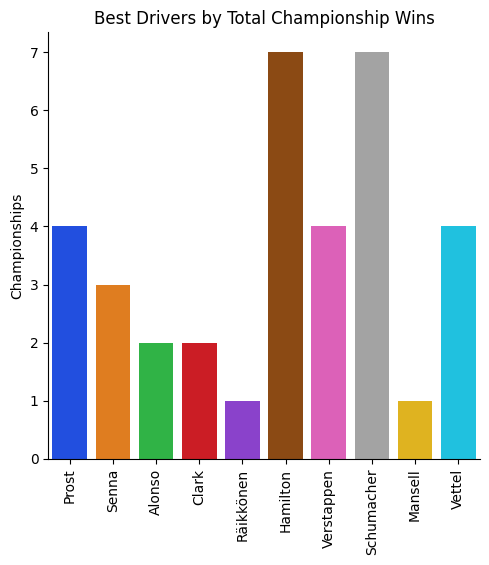

In [51]:
champ = sns.catplot(data=top_10_drivers, kind='bar', x='last_name', y='total_championship_wins', errorbar=None, 
                   hue='last_name')
for ax in champ.axes.flat:
    ax.set_title('Best Drivers by Total Championship Wins')
    ax.set_xlabel('')
    ax.set_ylabel('Championships')
    ax.tick_params('x', labelrotation=90)

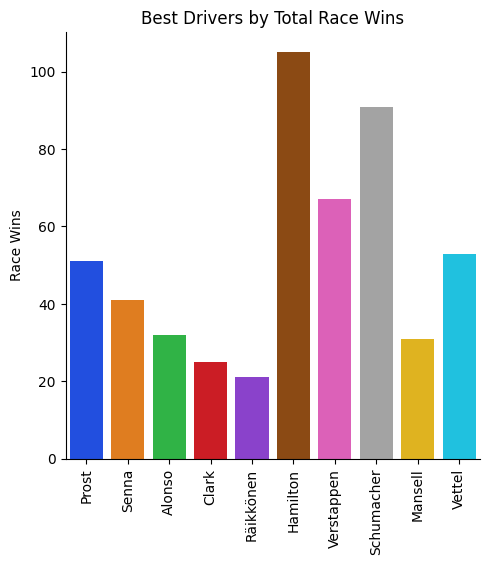

In [52]:
wins = sns.catplot(data=top_10_drivers, kind='bar', x='last_name', y='total_race_wins', errorbar=None, hue='last_name')
for ax in wins.axes.flat:
    ax.set_title('Best Drivers by Total Race Wins')
    ax.set_xlabel('')
    ax.set_ylabel('Race Wins')
    ax.tick_params('x', labelrotation=90)

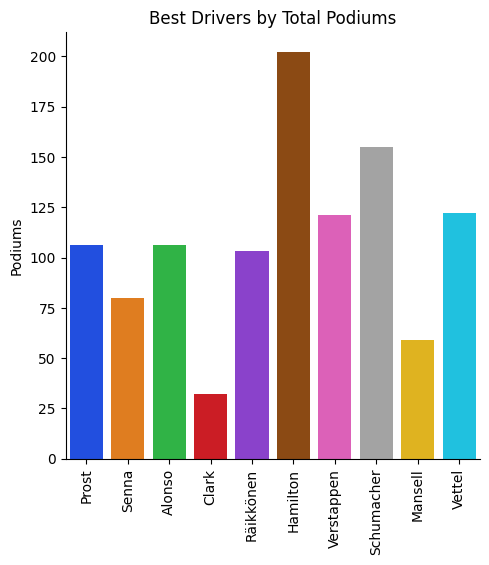

In [53]:
pods = sns.catplot(data=top_10_drivers, kind='bar', x='last_name', y='total_podiums', errorbar=None, hue='last_name')
for ax in pods.axes.flat:
    ax.set_title('Best Drivers by Total Podiums')
    ax.set_xlabel('')
    ax.set_ylabel('Podiums')
    ax.tick_params('x', labelrotation=90)

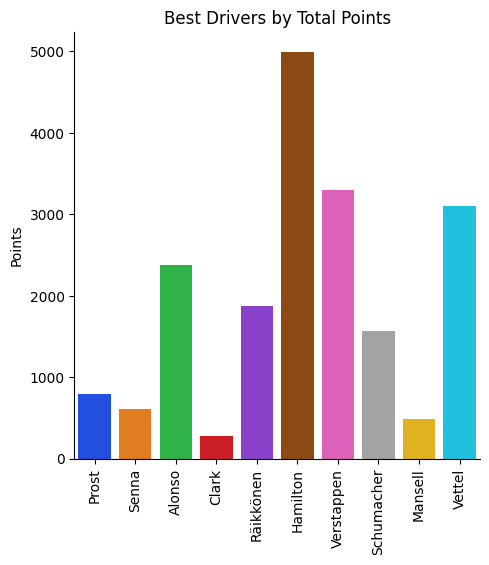

In [54]:
point = sns.catplot(data=top_10_drivers, kind='bar', x='last_name', y='total_points', errorbar=None, hue='last_name')
for ax in point.axes.flat:
    ax.set_title('Best Drivers by Total Points')
    ax.set_xlabel('')
    ax.set_ylabel('Points')
    ax.tick_params('x', labelrotation=90)

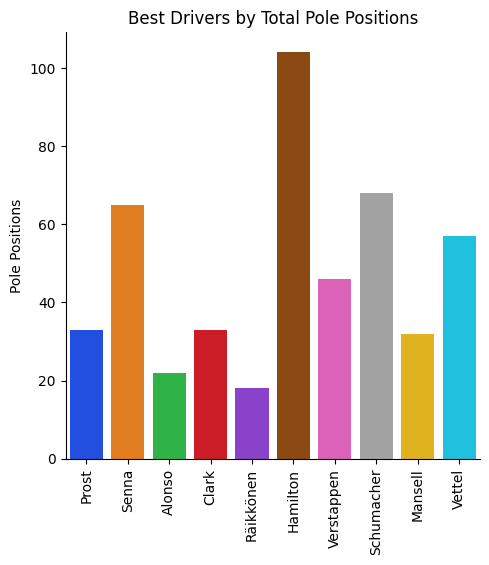

In [55]:
pole = sns.catplot(data=top_10_drivers, kind='bar', x='last_name', y='total_pole_positions', errorbar=None, hue='last_name')
for ax in pole.axes.flat:
    ax.set_title('Best Drivers by Total Pole Positions')
    ax.set_xlabel('')
    ax.set_ylabel('Pole Positions')
    ax.tick_params('x', labelrotation=90)

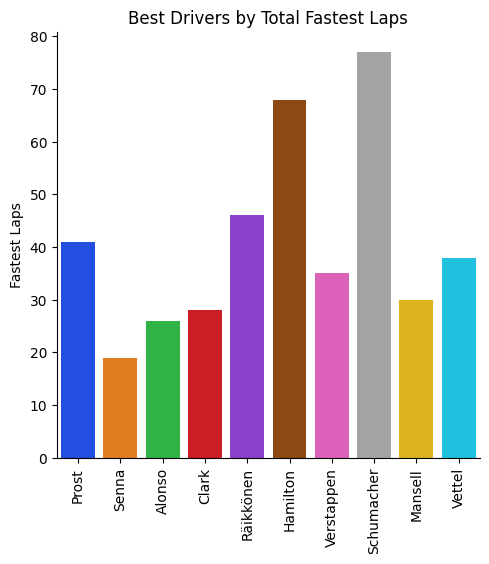

In [56]:
laps = sns.catplot(data=top_10_drivers, kind='bar', x='last_name', y='total_fastest_laps', errorbar=None, hue='last_name')
for ax in laps.axes.flat:
    ax.set_title('Best Drivers by Total Fastest Laps')
    ax.set_xlabel('')
    ax.set_ylabel('Fastest Laps')
    ax.tick_params('x', labelrotation=90)

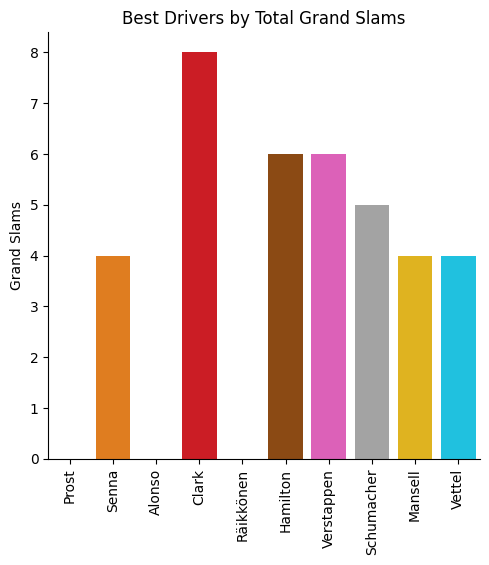

In [57]:
slam = sns.catplot(data=top_10_drivers, kind='bar', x='last_name', y='total_grand_slams', errorbar=None, hue='last_name')
for ax in slam.axes.flat:
    ax.set_title('Best Drivers by Total Grand Slams')
    ax.set_xlabel('')
    ax.set_ylabel('Grand Slams')
    ax.tick_params('x', labelrotation=90)

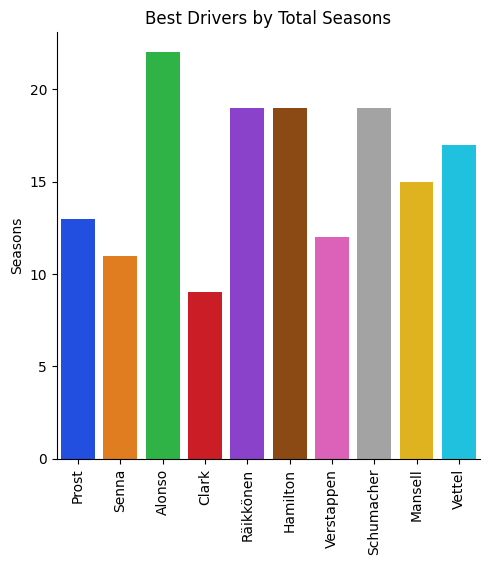

In [58]:
sea = sns.catplot(data=top_10_drivers, kind='bar', x='last_name', y='seasons', errorbar=None, hue='last_name')
for ax in sea.axes.flat:
    ax.set_title('Best Drivers by Total Seasons')
    ax.set_xlabel('')
    ax.set_ylabel('Seasons')
    ax.tick_params('x', labelrotation=90)

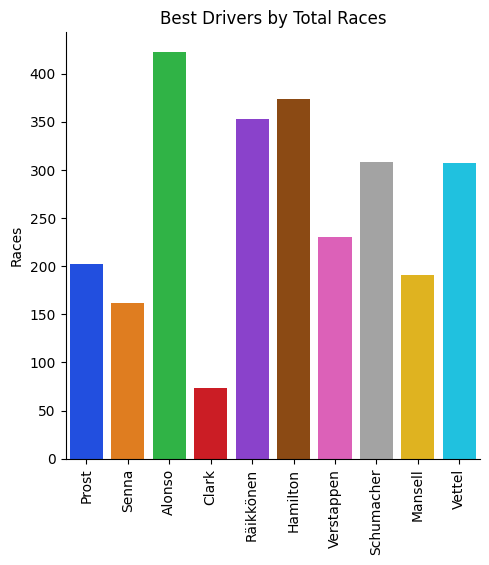

In [61]:
rac = sns.catplot(data=top_10_drivers, kind='bar', x='last_name', y='races', errorbar=None, hue='last_name')
for ax in rac.axes.flat:
    ax.set_title('Best Drivers by Total Races')
    ax.set_xlabel('')
    ax.set_ylabel('Races')
    ax.tick_params('x', labelrotation=90)